# My Model

This page provides an in-depth overview of the emotion detection model used in this project.

## Model Overview

- **Model Name:** My_Model_1.h5
- **Model Type:** Tensorflow model for emotion detection
- **Framework:** Tensorflow
- **Number of Classes:** 3 classes
- **Performance Metrics:** Accuracy, Confusion Matrix

## Model Architecture

The emotion detection model is constructed using TensorFlow and follows a Convolutional Neural Network (CNN) architecture. The model is designed to classify images into different emotional categories. Below, I'll provide a detailed explanation of the model's architecture:

### Model Layers and Components

1. **Input Layer**:
   - **Shape**: (None, None, 3)
   - **Description**: The input layer accepts images with three color channels (RGB). The use of "None" in the shape indicates that the model can handle images of various sizes.

2. **Image Preprocessing (resize_and_rescale)**:
   - **Description**: This step, which is not detailed in the code snippet, likely involves resizing and rescaling input images to ensure uniformity in image size and pixel values.

3. **First Convolutional Layer**:
   - **Filters**: configrations["n_fliters_1"]
   - **Kernel Size**: configrations["kernal_size"]
   - **Stride**: configrations["n_strides"]
   - **Kernel Regularization**: L2(configrations["regularization_rate"])
   - **Activation Function**: ReLU
   - **Description**: This layer applies convolution to learn low-level image features. The ReLU activation function introduces non-linearity. Batch normalization is applied to normalize activations, and max-pooling is used to reduce spatial dimensions.

4. **Second Convolutional Layer**:
   - **Filters**: configrations["n_fliters_2"]
   - **Kernel Size**: configrations["kernal_size"]
   - **Stride**: configrations["n_strides"]
   - **Kernel Regularization**: L2(configrations["regularization_rate"])
   - **Activation Function**: ReLU
   - **Description**: Similar to the first convolutional layer, this layer extracts additional features.

5. **Flatten Layer**:
   - **Description**: After the convolutional layers, the feature maps are flattened into a 1D vector for further processing.

6. **First Dense Layer**:
   - **Units**: configrations["n_dense_1"]
   - **Activation Function**: ReLU
   - **Kernel Regularization**: L2(configrations["regularization_rate"])
   - **Description**: This dense layer introduces non-linearity and learns higher-level features from the flattened feature vectors. Batch normalization and dropout are applied for stability and overfitting prevention.

7. **Second Dense Layer**:
   - **Units**: configrations["n_dense_1"]
   - **Activation Function**: ReLU
   - **Kernel Regularization**: L2(configrations["regularization_rate"])
   - **Description**: Similar to the first dense layer, this layer further processes the feature vectors, promoting feature learning.

8. **Output Layer**:
   - **Units**: configrations["n_class"]
   - **Activation Function**: Softmax
   - **Description**: The output layer produces class probabilities for different emotions. It employs the softmax activation function for classification.

The specific values for parameters like n_filters, kernel size, stride, kernel regularization rate, dropout rate, and the number of classes are defined in the `configurations` dictionary. These values can be adjusted to meet the requirements of the emotion classification task.


## Training Process

The training process used to fine-tune the model involved the following key components:

- **Dataset Used for Training**: The model was trained on a dataset specifically curated for emotion detection. This dataset contains images labeled with various emotions, making it suitable for training the classification model.

- **Data Preprocessing and Augmentation**: Data preprocessing steps, including resizing and rescaling, were applied as described in the "Image Preprocessing" section above. Additionally, data augmentation techniques, such as random rotations, flips, and brightness adjustments, were employed to increase the model's robustness and ability to generalize to different image variations.

- **Hyperparameters**: Hyperparameters, such as the learning rate, batch size, and optimizer choice, were carefully tuned to optimize the training process. The specific values of these hyperparameters are available in the model training code.

- **Training Duration**: The model was trained for a specific number of epochs to ensure convergence and the best possible performance. The training duration depends on the dataset size and the complexity of the model but typically involves several hours or more.

- **Challenges Faced During Training**: During training, common challenges, such as overfitting or vanishing gradients, were monitored and addressed. Hyperparameter tuning and regularization techniques were used to mitigate these challenges.

## Evaluation

The model's performance was evaluated using various evaluation metrics, including accuracy, and confusion matrices. The achieved results demonstrated the model's effectiveness in recognizing emotions in images. The specific evaluation metrics and results can be found in the model training code and documentation.

## Model Files

Model files, including pretrained weights and checkpoints, can be found in the model directory of the GitHub repository. These files are available for download and usage in your projects. Additionally, the ONNX and TensorFlow Lite model files, as well as quantized versions, are included in the repository for various deployment scenarios.

## Usage

To load and use the model in your project, follow these steps:

1. Clone the GitHub repository to your local machine.

2. Install the required Python dependencies listed in `requirements.txt` using `pip install -r requirements.txt`.

3. Import the model into your project using the appropriate framework or library. Sample code for loading and using the model can be found in the provided usage examples.

4. Use the model to classify emotions in images by passing the image data as input. Detailed usage instructions and code examples can be found in the documentation.

## Further Improvements

While the current model is effective for emotion detection, there are several areas for potential improvements and future work, including:

- **Better Architecture Choices**: Experiment with different CNN architectures and neural network designs to enhance the model's performance.

- **Larger Datasets**: Consider expanding the dataset with more diverse images and emotions to improve the model's ability to recognize a broader range of emotions.

- **Alternative Training Strategies**: Explore alternative training strategies, such as transfer learning from larger pre-trained models or semi-supervised learning techniques.

## References

- [Data Link](https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes?rvi=1): Human Emotions Dataset(HES)


## Install libraries

In [1]:
pip install albumentations seaborn

Note: you may need to restart the kernel to use updated packages.


# Importing

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model

from tensorflow.keras.layers import (
    Normalization, Dense, InputLayer, Conv2D, GlobalAveragePooling2D,
    MaxPool2D, Flatten, BatchNormalization, Input, MaxPooling2D,
    Layer, Dropout, RandomFlip, RandomRotation, Permute,
    Resizing, Rescaling, RandomContrast, Activation, Add)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import ( Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)

from tensorflow.keras.metrics import (
    SparseTopKCategoricalAccuracy, SparseCategoricalAccuracy,
    BinaryAccuracy, Accuracy, Precision, Recall, TruePositives,
    TrueNegatives, FalsePositives, FalseNegatives, AUC,
    CategoricalCrossentropy, SparseCategoricalCrossentropy,
    CategoricalAccuracy, TopKCategoricalAccuracy)


from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.image import flip_up_down, flip_left_right
import albumentations as A
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Use Model Parameters in a Dictionary for Easy Modification

In [3]:
train_dir = "/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train"
test_dir = "/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/test"
class_names = ["angry", "happy", "sad"]

configrations = {"image_size": 256,
                 "batch_size": 32,
                 "learning_rate": 0.001,
                 "n_epochs": 100,
                 "dropout_rate": 0.2,
                 "regularization_rate": 0.0,
                 "n_fliters_1": 128,
                 "n_fliters_2": 64,
                 "kernal_size": 3,
                 "n_strides": 1,
                 "pool_size": 2,
                 "n_dense_1": 64,
                 "n_dense_2": 64,
                 "n_class": 3,
                 "class_names": class_names,
}

## Reading Data

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=configrations["batch_size"],
    image_size=(configrations["image_size"], configrations["image_size"]),
    shuffle=True,
    seed=99
)

Found 6799 files belonging to 3 classes.


In [5]:
val_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=configrations["batch_size"],
    image_size=(configrations["image_size"], configrations["image_size"]),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


In [6]:
for item in val_data.take(1):
    print(item)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 20.        ,  20.        ,  20.        ],
         [ 19.1875    ,  19.1875    ,  19.1875    ],
         [ 19.        ,  19.        ,  19.        ],
         ...,
         [ 29.125     ,  29.125     ,  29.125     ],
         [ 25.        ,  25.        ,  25.        ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.        ,  20.        ,  20.        ],
         [ 19.847656  ,  19.847656  ,  19.847656  ],
         [ 19.8125    ,  19.8125    ,  19.8125    ],
         ...,
         [ 28.820312  ,  28.820312  ,  28.820312  ],
         [ 25.660156  ,  25.660156  ,  25.660156  ],
         [ 25.        ,  25.        ,  25.        ]],

        [[ 20.6875    ,  20.6875    ,  20.6875    ],
         [ 21.246094  ,  21.246094  ,  21.246094  ],
         [ 21.847656  ,  21.847656  ,  21.847656  ],
         ...,
         [ 25.3125    ,  25.3125    ,  25.3125    ],
         [ 22.375     ,  22.375     ,  22.375 

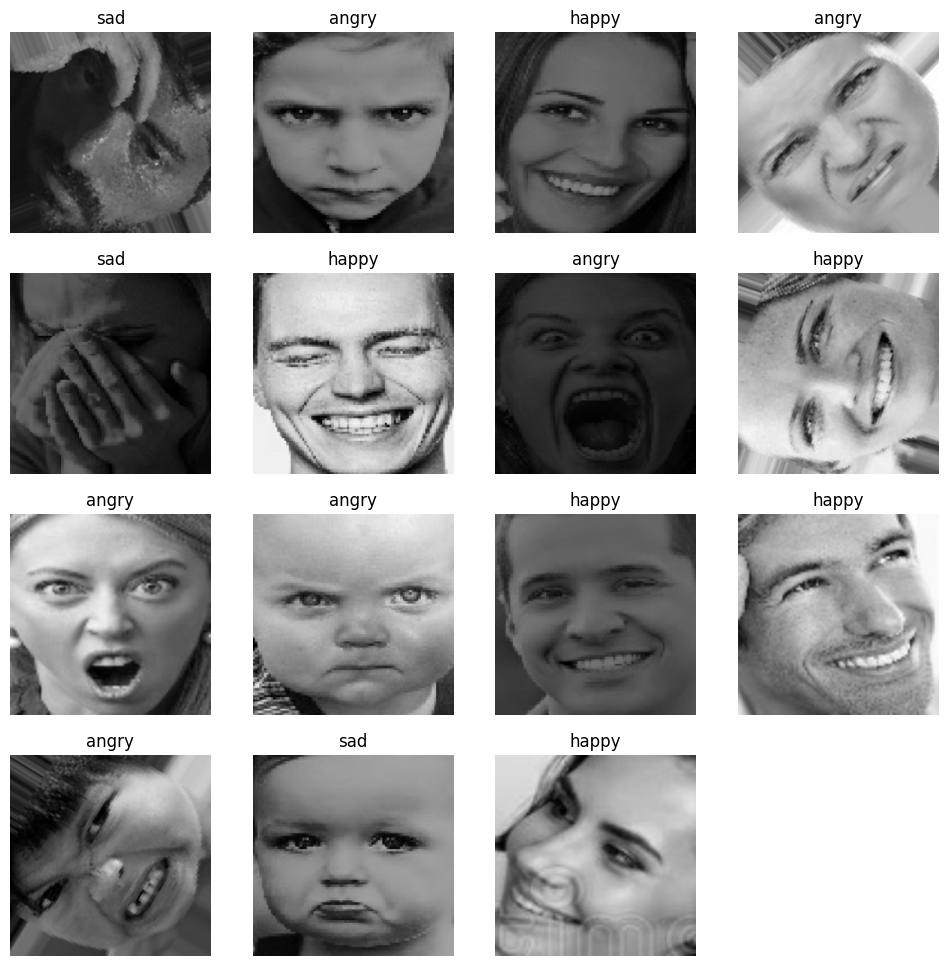

In [7]:
plt.figure(figsize = (12, 12) )

for images, labels in train_data.take(1):
    for i in range(15):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i]/255.0)
        plt.title(class_names[tf.argmax(labels[i], axis=0).numpy()] )  #to show the max number in list
        plt.axis("off")

### Data Augmentation for Training

Data augmentation is a vital technique in deep learning, particularly for image classification tasks. It enhances the model's robustness and generalization by introducing variations into the training dataset. This code snippet demonstrates the key components of data augmentation:

- **Data Augmentation Layers**: These are a set of image transformation operations, such as random rotation, horizontal flipping, and contrast adjustment. They create diverse versions of the input images, exposing the model to various data variations.

- **Data Augmentation Function**: A custom function, often named `augment_layer`, applies the data augmentation layers to individual image-label pairs. This function ensures that data augmentation is only performed during the training phase, preventing alterations to evaluation or test data.

- **Training Data Augmentation**: The augmented dataset is generated by mapping the `augment_layer` function to the training dataset. This process produces multiple augmented versions of each image, enriching the training dataset.

Data augmentation is a powerful tool for improving model generalization, especially when working with limited or less diverse training data. It helps the model adapt to real-world variations and challenges, ultimately enhancing its performance during training.


In [9]:
augent_layers = tf.keras.Sequential([
    RandomRotation(factor=(-0.025, 0.025)),
    RandomFlip(mode="horizontal"),
    RandomContrast(factor=0.1),

])

In [10]:
def augment_layer(image, label):
    return augent_layers(image, training = True), label

In [11]:
training_data = (
    train_data
    .map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
#     .prefetch(tf.data.AUTOTUNE)

)

In [12]:
validation_data = (
    val_data
#     .prefetch(tf.data.AUTOTUNE)

)

## Show data after Augentation

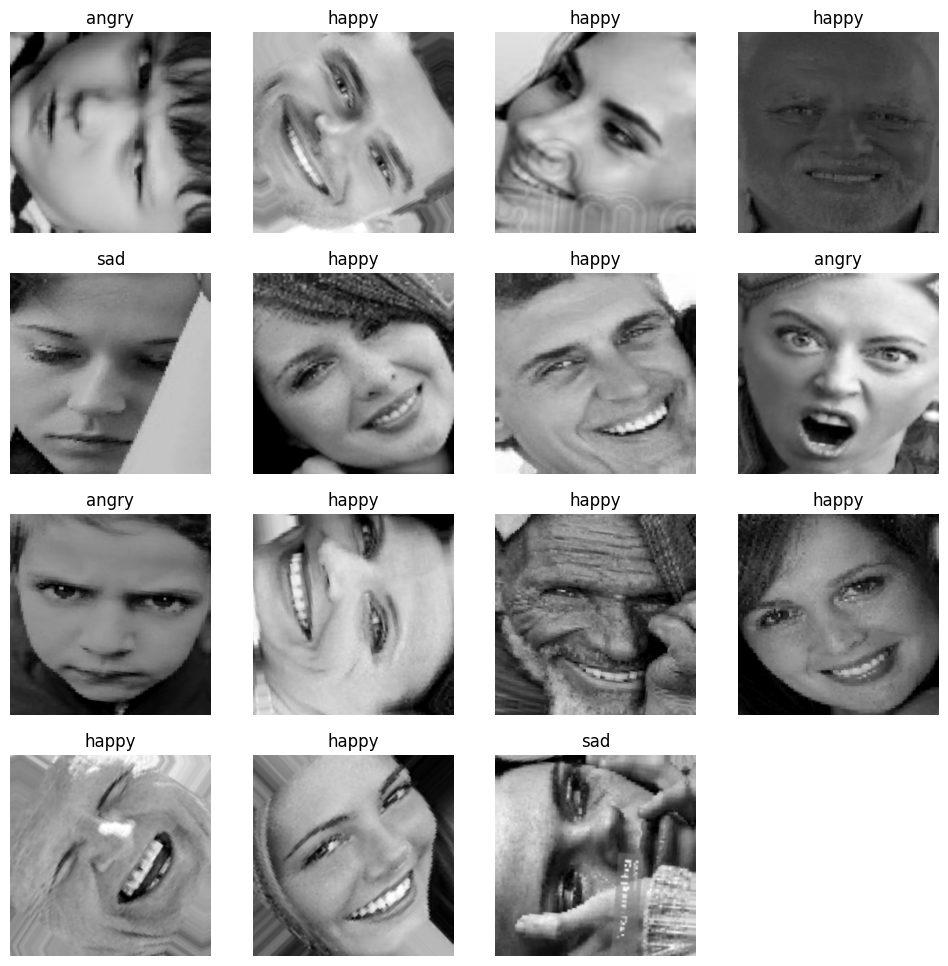

In [13]:
plt.figure(figsize = (12, 12) )

for images, labels in training_data.take(1):
    for i in range(15):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i]/255.0)
        plt.title(class_names[tf.argmax(labels[i], axis=0).numpy()] )  #to show the max number in list
        plt.axis("off")

### Image Preprocessing with Variable Parameters

#### This code snippet demonstrates a simple yet powerful concept: 
- the use of variables for image preprocessing parameters to improve code flexibility.

In [14]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  Resizing(configrations["image_size"], configrations["image_size"]),
  Rescaling(1./255)
])

### Model Architecture

The code defines a neural network model using TensorFlow's Keras API. The model architecture is designed for image classification and is composed of several layers, each with a specific role:

1. **Input Layer**:
   - **Shape**: `(None, None, 3)`
   - **Description**: This layer defines the input shape for the model, which accepts images with three color channels (RGB). The use of "None" in the shape allows the model to handle images of various sizes.

2. **Preprocessing (resize_and_rescale)**:
   - **Description**: The preprocessing step resizes and rescales input images. This ensures that images are in a consistent format suitable for the CNN. Specific details of this step are not provided in the code snippet.

3. **Convolutional Layers**:

   - **First Convolutional Layer**:
     - **Filters**: `configrations["n_filters_1"]`
     - **Kernel Size**: `configrations["kernel_size"]`
     - **Stride**: `configrations["n_strides"]`
     - **Kernel Regularization**: L2(configrations["regularization_rate"])
     - **Activation Function**: ReLU
     - **Batch Normalization**: Applied to normalize activations.
     - **Max-Pooling Layer**:
       - **Pool Size**: `configrations["pool_size"]`

   - **Second Convolutional Layer**:
     - **Filters**: `configrations["n_filters_2"]`
     - **Kernel Size**: `configrations["kernel_size"]`
     - **Stride**: `configrations["n_strides"]`
     - **Kernel Regularization**: L2(configrations["regularization_rate"])
     - **Activation Function**: ReLU
     - **Batch Normalization**: Applied for normalization.
     - **Max-Pooling Layer**:
       - **Pool Size**: `configrations["pool_size"]`

4. **Flatten Layer**:
   - **Description**: After the convolutional layers, the feature maps are flattened into a 1D vector, making them ready for processing by the fully connected layers.

5. **Fully Connected (Dense) Layers**:

   - **First Dense Layer**:
     - **Units**: `configrations["n_dense_1"]`
     - **Activation Function**: ReLU
     - **Kernel Regularization**: L2(configrations["regularization_rate"])
     - **Batch Normalization**: Applied for stabilization.
     - **Dropout Layer**:
       - **Rate**: `configrations["dropout_rate"]`
       - **Description**: Dropout is used to prevent overfitting.

   - **Second Dense Layer**:
     - **Units**: `configrations["n_dense_1"]`
     - **Activation Function**: ReLU
     - **Kernel Regularization**: L2(configrations["regularization_rate"])
     - **Batch Normalization**: Applied for stability.

6. **Output Layer**:
   - **Units**: `configrations["n_class"]`
   - **Activation Function**: Softmax
   - **Description**: The model concludes with an output layer that produces class probabilities for the given input image. This is the final step in classifying the emotion in the image.

The specific values for parameters like `n_filters_1`, `n_filters_2`, `kernel_size`, `pool_size`, `n_dense_1`, `dropout_rate`, and `n_class` are determined by the values provided in the `configurations` dictionary, which can be customized based on the requirements of your emotion detection task.


In [15]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(None, None, 3)),

    resize_and_rescale,

    Conv2D(filters=configrations["n_fliters_1"], kernel_size=configrations["kernal_size"], strides=configrations["n_strides"],
           kernel_regularizer=L2(configrations["regularization_rate"]), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=configrations["pool_size"], strides=configrations["n_strides"]),

    Conv2D(filters=configrations["n_fliters_2"], kernel_size=configrations["kernal_size"], strides=configrations["n_strides"],
           kernel_regularizer=L2(configrations["regularization_rate"]), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=configrations["pool_size"], strides=configrations["n_strides"]),

    Flatten(),

    Dense(configrations["n_dense_1"], activation="relu",
          kernel_regularizer=L2(configrations["regularization_rate"]) ),
    BatchNormalization(),
    Dropout(rate=configrations["dropout_rate"]),

    Dense(configrations["n_dense_1"], activation="relu",
    kernel_regularizer=L2(configrations["regularization_rate"]) ),
    BatchNormalization(),

    Dense(configrations["n_class"], activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 253, 253, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 251, 251, 64)      73792     
                                                                 
 batch_normalization_1 (Batc  (None, 251, 251, 64)    

### Loss Function Selection

In deep learning, the choice of an appropriate loss function is critical and depends on the nature of the problem you are solving. The code snippet demonstrates the selection of a loss function, specifically for image classification tasks.

**Categorical Crossentropy Loss (for one-hot encoded labels)**:
- **Loss Function**: `CategoricalCrossentropy()`
- **Description**: This loss function is commonly used when your target labels are one-hot encoded. In this setup, each target label is represented as a binary vector, where only one element is "1" (indicating the class) and the rest are "0." This loss function computes the cross-entropy between the predicted class probabilities (output of the model) and the true class labels.

**Sparse Categorical Crossentropy Loss (for integer class labels)**:
- **Loss Function**: `SparseCategoricalCrossentropy(from_logits=False)`
- **Description**: This loss function is appropriate when your target labels are integers, where each integer represents the class index directly. In this case, there's no need for one-hot encoding. The loss function calculates the cross-entropy between the model's predicted class probabilities and the integer class labels.

It's important to note that the choice of the loss function depends on how your target labels are represented. If they are one-hot encoded, you should use `CategoricalCrossentropy()`, and if they are integers representing class indices, you should use `SparseCategoricalCrossentropy(from_logits=False)`.

The `from_logits` parameter is set to `False` in both cases, indicating that the model's output is not treated as logits (raw predictions) and that a softmax activation function should be applied to the model's output before computing the loss.

Selecting the correct loss function is essential for training your model effectively and achieving the desired performance in your image classification task.


In [17]:
loss_function = CategoricalCrossentropy()  # Set from_logits based on your model if use softmax from_logits = Fals
# loss_function = SparseCategoricalCrossentropy(from_logits=False) # This loss function is used when your target labels are integers, where each integer represents the class index directly

### Model Evaluation Metrics

In deep learning, model performance is assessed using various evaluation metrics, which provide insights into how well the model is performing on a given task. The code snippet defines a set of evaluation metrics to measure the performance of the model in the context of image classification.

**Categorical Accuracy**:
- **Metric**: `CategoricalAccuracy(name="accuracy")`
- **Description**: Categorical accuracy measures the proportion of correctly classified samples. For multi-class classification tasks where each sample belongs to a single class, this metric is commonly used to evaluate the overall accuracy of the model's predictions.

**Top-K Categorical Accuracy**:
- **Metric**: `TopKCategoricalAccuracy(k=2, name="Top_K_Accuracy")`
- **Description**: Top-K categorical accuracy assesses the model's performance in predicting the correct class among the top-k predicted classes. In this case, `k=2` means the model's prediction is considered correct if the true class is among the top 2 predicted classes. This metric accounts for partially correct predictions and is useful when the model's top predictions matter.

**Sparse Categorical Accuracy (Alternative)**:
- **Metric**: `[SparseCategoricalAccuracy(name="Accuracy")]`
- **Description**: This is an alternative metric used when your target labels are integers (class indices) and not one-hot encoded. It measures the proportion of correctly classified samples. The name "Accuracy" is assigned to this metric.

These evaluation metrics help you gauge how well your model is performing during training and evaluation. Depending on the nature of your image classification task and the representation of your target labels, you can select the appropriate metrics for assessing the model's accuracy and prediction quality.

Selecting the right evaluation metrics is essential to monitor and improve your model's performance during training and testing.


In [18]:
metrics = [CategoricalAccuracy(name="accuracy"), TopKCategoricalAccuracy(k=2, name="Top_K_Accuracy")]
# metrics = [SparseCategoricalAccuracy(name="Accuracy")]

In [19]:
model.compile(
    optimizer=Adam(learning_rate=configrations["learning_rate"]),
    loss="categorical_crossentropy", metrics=metrics) # sparse_categorical_crossentropy



# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Callbacks for Model Training

Callbacks are essential tools in deep learning that allow you to monitor and control the training process. They enable you to perform actions during training based on specific conditions or events. The code snippet defines several callbacks that serve various purposes during the training of a deep learning model:

**Model Checkpoint Callback**:
- **Callback**: `ModelCheckpoint`
- **Description**: This callback is used to save the model's weights to a file when certain conditions are met. In this case, it saves the model weights to a file named "my_model_1.h5" located in the specified directory ("/kaggle/working/").
- **Conditions**:
  - `monitor="val_accuracy"`: The callback monitors the validation accuracy. When the validation accuracy improves, it saves the model's weights.
  - `save_best_only=True`: It ensures that only the best (highest) accuracy models are saved.
  - `verbose=1`: This parameter controls the verbosity of the output, with a value of 1 indicating that saving is reported during training.

**Reduce Learning Rate on Plateau Callback**:
- **Callback**: `ReduceLROnPlateau`
- **Description**: This callback dynamically adjusts the learning rate during training based on specific conditions. Reducing the learning rate can help the model converge more effectively.
- **Conditions**:
  - `monitor='val_accuracy'`: The callback monitors the validation accuracy.
  - `patience=2`: If no improvement is observed in validation accuracy for 2 consecutive epochs, the learning rate is reduced.
  - `min_lr=1e-5`: The learning rate is reduced to a minimum value of 1e-5.
  - `verbose=1`: It provides output messages about learning rate reductions during training.

**Early Stopping Callback**:
- **Callback**: `EarlyStopping`
- **Description**: This callback monitors the validation accuracy and stops training when specific conditions are met, preventing overfitting.
- **Conditions**:
  - `monitor='val_accuracy'`: The callback tracks validation accuracy.
  - `patience=5`: If no improvement is observed in validation accuracy for 5 consecutive epochs, training is stopped.
  - `verbose=1`: It provides information about early stopping in the training output.

These callbacks help you manage model training effectively by saving the best model, adjusting the learning rate, and preventing overfitting when training deep learning models. The specific conditions and parameters can be adjusted to suit your training goals and dataset characteristics.


In [20]:
check_point = ModelCheckpoint(
    "/kaggle/working/my_model_1.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

redlr = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    min_lr=1e-5,
    verbose=1
)

es = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1
)


In [21]:
history = model.fit(training_data,
                    validation_data=validation_data, 
                    verbose=1, 
                    epochs=configrations["n_epochs"],
                    callbacks = [check_point, redlr, es],
                    )

Epoch 1/100
213/213 [==============================] - ETA: 0s - loss: 1.1168 - accuracy: 0.4412 - Top_K_Accuracy: 0.7544
Epoch 1: val_accuracy improved from -inf to 0.44205, saving model to /kaggle/working/my_model_1.h5
213/213 [==============================] - 147s 588ms/step - loss: 1.1168 - accuracy: 0.4412 - Top_K_Accuracy: 0.7544 - val_loss: 1.1010 - val_accuracy: 0.4421 - val_Top_K_Accuracy: 0.7265 - lr: 0.0010
Epoch 2/100
213/213 [==============================] - ETA: 0s - loss: 0.9961 - accuracy: 0.5190 - Top_K_Accuracy: 0.8041
Epoch 2: val_accuracy improved from 0.44205 to 0.44644, saving model to /kaggle/working/my_model_1.h5
213/213 [==============================] - 124s 581ms/step - loss: 0.9961 - accuracy: 0.5190 - Top_K_Accuracy: 0.8041 - val_loss: 1.0486 - val_accuracy: 0.4464 - val_Top_K_Accuracy: 0.7730 - lr: 0.0010
Epoch 3/100
213/213 [==============================] - ETA: 0s - loss: 0.9445 - accuracy: 0.5573 - Top_K_Accuracy: 0.8239
Epoch 3: val_accuracy improve

In [22]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,Top_K_Accuracy,val_loss,val_accuracy,val_Top_K_Accuracy,lr
0,1.116803,0.441241,0.754376,1.100976,0.442054,0.726514,0.00100
1,0.996116,0.519047,0.804089,1.048587,0.446444,0.773047,0.00100
2,0.944465,0.557288,0.823945,1.149736,0.512730,0.807726,0.00100
3,0.908613,0.580379,0.845565,1.186137,0.393327,0.645742,0.00100
4,0.852949,0.615385,0.859685,0.866673,0.598771,0.851185,0.00100
...,...,...,...,...,...,...,...
64,0.286819,0.893661,0.980144,0.546243,0.790606,0.940737,0.00001
65,0.293273,0.894102,0.980585,0.547300,0.791923,0.942493,0.00001
66,0.293626,0.893220,0.977203,0.545559,0.789289,0.942054,0.00001
67,0.280442,0.892043,0.981762,0.547011,0.788411,0.940737,0.00001


## Show loss and Accuracy in Train and Test

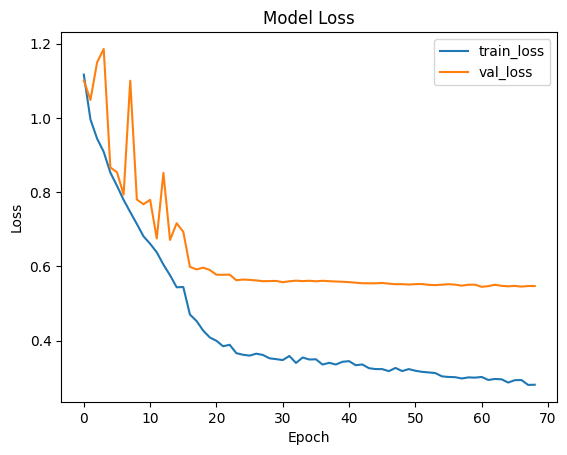

In [23]:
plt.plot(df["loss"])
plt.plot(df["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train_loss", "val_loss"])
plt.show()

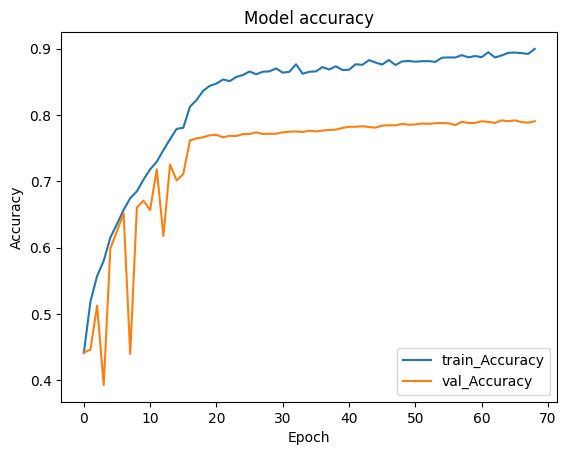

In [24]:
plt.plot(df["accuracy"])
plt.plot(df["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train_Accuracy", "val_Accuracy"])
plt.show()

# Model evaluation

In [25]:
model.evaluate(validation_data)

72/72 [==============================] - 8s 112ms/step - loss: 0.5470 - accuracy: 0.7906 - Top_K_Accuracy: 0.9425


[0.5470223426818848, 0.7906057834625244, 0.9424934387207031]

## Show original and Prediction data

In [26]:
def fit_image(images, model=model):

    img = tf.constant(images, dtype=tf.float32)
    im = tf.image.resize(img, (256, 256))  # Resize the image to match the model's input shape
    im = tf.expand_dims(im, axis=0)

    predicted_label = class_names[tf.argmax(model(im), axis=-1).numpy()[0]]

    return predicted_label


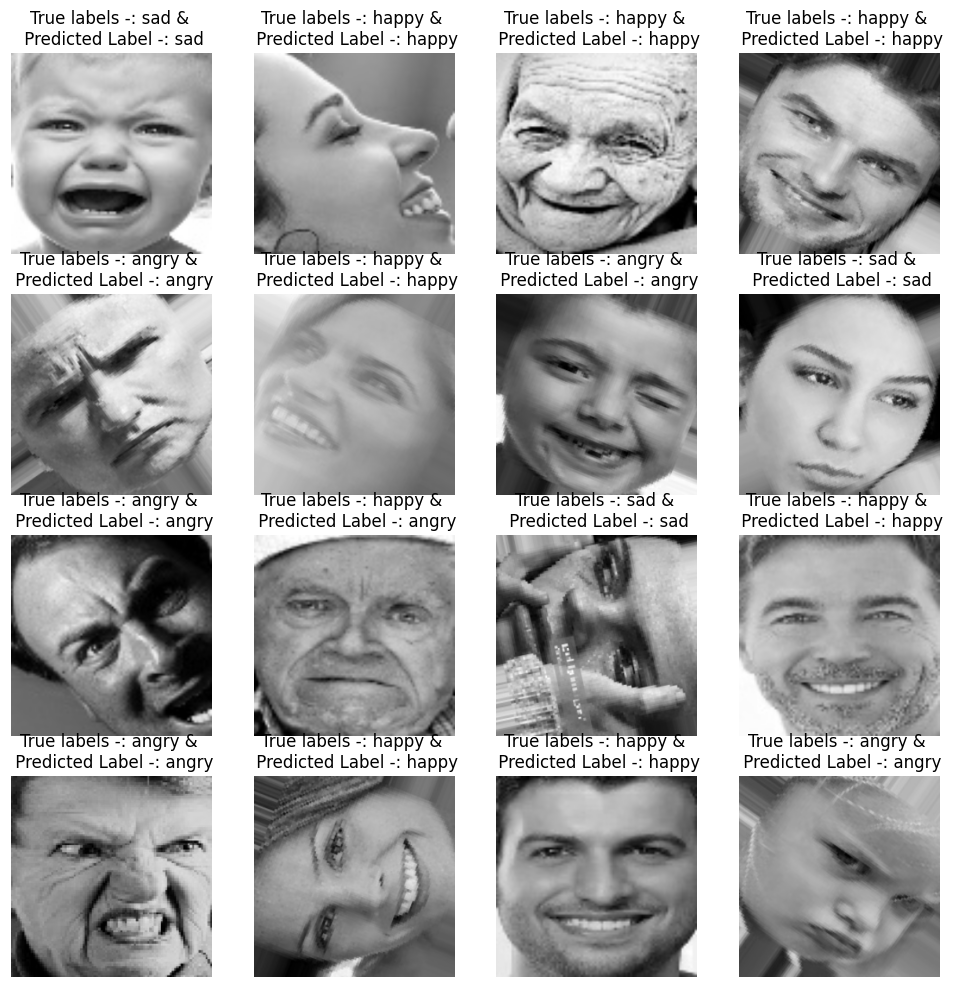

In [27]:
plt.figure(figsize = (12, 12) )

for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i] / 255.0)

        true_label = class_names[tf.argmax(labels[i], axis=0).numpy()]
        predicted_label = fit_image(images[i])  # Pass the model as an argument

        plt.title(f"True labels -: {true_label} & \n Predicted Label -: {predicted_label}")
        plt.axis("off")


## **Confution Matrix**

In [28]:
predicted = []
labels = []

for im, label in validation_data.take(5):
    predicted.append(model(im))
    labels.append(label.numpy())

In [29]:
print(np.argmax(labels[:-1], axis=-1).flatten())
print(np.argmax(predicted[:-1], axis=-1).flatten())

[2 2 2 1 0 1 1 1 1 0 1 2 1 1 1 1 2 0 0 1 2 2 2 1 1 0 2 0 2 2 0 1 1 2 0 1 1
 1 1 1 1 0 1 0 1 0 1 2 2 2 1 1 2 1 2 1 1 2 1 1 2 1 2 2 0 2 2 2 0 2 1 1 0 0
 1 2 2 0 1 2 2 1 2 1 0 1 2 1 1 0 2 0 1 2 1 1 1 0 0 2 1 1 0 1 1 1 2 2 2 1 1
 0 1 2 1 1 1 1 0 2 1 2 1 2 1 0 0 2]
[0 2 1 0 1 2 1 1 1 0 1 2 1 1 1 1 2 0 0 1 2 2 2 1 1 1 2 2 2 2 0 1 2 2 1 1 1
 1 1 1 1 2 1 0 2 0 1 2 2 2 1 2 2 1 2 2 1 2 1 1 2 2 2 2 0 2 2 2 0 2 1 1 1 1
 1 2 2 0 1 0 2 1 2 1 0 0 2 1 1 0 2 0 1 2 1 1 0 0 0 2 1 1 0 1 1 1 2 1 2 1 1
 0 1 2 1 1 1 1 0 2 2 2 1 1 1 1 0 2]


In [30]:
lab = np.concatenate([np.argmax(labels[:-1], axis=-1).flatten(), np.argmax(labels[-1], axis=-1).flatten()])
pred = np.concatenate([np.argmax(predicted[:-1], axis=-1).flatten(), np.argmax(predicted[-1], axis=-1).flatten()])

[[23  7  4]
 [ 3 63  7]
 [ 3  3 47]]


Text(0.5, 58.7222222222222, 'prediction')

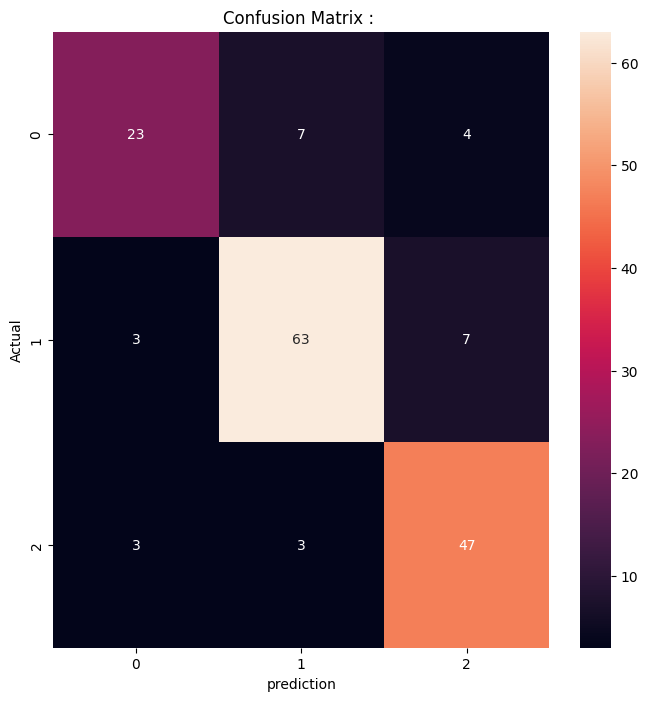

In [31]:
cm = confusion_matrix(lab, pred)
print(cm)

plt.figure(figsize=(8, 8))

sns.heatmap(cm, annot=True)

plt.title(f"Confusion Matrix : ")
plt.ylabel("Actual")
plt.xlabel("prediction")
